In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from head import AmplitudePhaseDistance
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import Rbf
from scipy import integrate
import numpy as np
import os
pyplot_style ={"text.usetex": True,
               "text.latex.preamble": r"\usepackage{amsfonts}\usepackage[version=4]{mhchem}",
               "axes.spines.right" : False,
               "axes.spines.top" : False,
               "font.size": 22,
               "savefig.dpi": 600,
               "savefig.bbox": 'tight'
              } 

## Load Data

In [2]:
def load_data(path, blank_path):
    y = pd.read_excel(path).values
    blank = pd.read_excel(blank_path).values[:,1]
    q = y[:,0]
    y = y - blank.reshape(-1,1)
    y = np.delete(y, 0, axis = 1)
    scaler = MinMaxScaler()
    y0 = scaler.fit(y).transform(y)
    return y0

In [3]:
path_0 = '../Fast Spectroscopic Exploration/Spectra/Spectra_0.xlsx'
path_1 = '../Fast Spectroscopic Exploration/Spectra/Spectra_1.xlsx'
path_2 = '../Fast Spectroscopic Exploration/Spectra/Spectra_2.xlsx'
path_3 = '../Fast Spectroscopic Exploration/Spectra/Spectra_3.xlsx'
path_4 = '../Fast Spectroscopic Exploration/Spectra/Spectra_4.xlsx'
path_5 = '../Fast Spectroscopic Exploration/Spectra/Spectra_5.xlsx'
blank_path = '../Fast Spectroscopic Exploration/Spectra/blank.xlsx'
y0 = load_data(path_0, blank_path)
y1 = load_data(path_1, blank_path)
y2 = load_data(path_2, blank_path)
y3 = load_data(path_3, blank_path)
y4 = load_data(path_4, blank_path)
y5 = load_data(path_5, blank_path)

In [4]:
y = np.hstack((y0, y1, y2, y3, y4, y5))

## Define Targets

In [5]:
df = pd.read_excel('../Fast Spectroscopic Exploration/Spectra/Simulations/plate_7nm_thickness.xlsx')
targets = df.values
wavelength = targets[:,0]
targets = np.delete(targets, 0, axis=1)

In [6]:
df2 = pd.read_excel('../Fast Spectroscopic Exploration/Spectra/Simulations/spheres.xlsx')
targets2 = df2.values
wv_s = targets2[:,0]
spheres = np.delete(targets2, 0, axis=1)
sphere_1 = spheres[:,0]
sphere_2 = spheres[:,1]
sphere_3 = spheres[:,2]
sphere_4 = spheres[:,3]
scaler = MinMaxScaler()
targets = scaler.fit(targets).transform(targets)

In [7]:
wv = np.linspace(350, 800, 91)
interp_func = Rbf(wavelength, targets[:,0])
target_1 = interp_func(wv).reshape(-1,1)
target_1 = scaler.fit(target_1).transform(target_1)
interp_func = Rbf(wavelength, targets[:,1])
target_2 = interp_func(wv).reshape(-1,1)
target_2 = scaler.fit(target_2).transform(target_2)
interp_func = Rbf(wavelength, targets[:,2])
target_3 = interp_func(wv).reshape(-1,1)
target_3 = scaler.fit(target_3).transform(target_3)
interp_func = Rbf(wavelength, targets[:,3])
target_4 = interp_func(wv).reshape(-1,1)
target_4 = scaler.fit(target_4).transform(target_4)
interp_func = Rbf(wavelength, sphere_1.flatten())
sphere_1 = interp_func(wv).reshape(-1,1)
sphere_1 = scaler.fit(sphere_1).transform(sphere_1)
interp_func = Rbf(wavelength, sphere_2.flatten())
sphere_2 = interp_func(wv).reshape(-1,1)
sphere_2 = scaler.fit(sphere_2).transform(sphere_2)
interp_func = Rbf(wavelength, sphere_3.flatten())
sphere_3 = interp_func(wv).reshape(-1,1)
sphere_3 = scaler.fit(sphere_3).transform(sphere_3)
interp_func = Rbf(wavelength, sphere_4.flatten())
sphere_4 = interp_func(wv).reshape(-1,1)
sphere_4 = scaler.fit(sphere_4).transform(sphere_4)

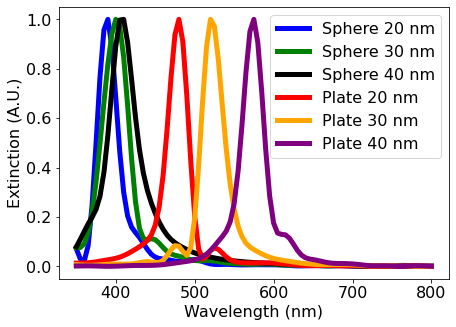

In [10]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(7,5))
# plt.plot(wv, sphere_1, label = 'Sphere 20 nm', linewidth = 5, color = 'deepskyblue')
# plt.plot(wv, sphere_2, label = 'Sphere 30 nm', linewidth = 5, color = 'blue')
# plt.plot(wv, sphere_4, label = 'Sphere 40 nm', linewidth = 5, color = 'darkblue')
# plt.plot(wv, target_1, label = 'Plate 20 nm', linewidth = 5, color = 'springgreen')
# plt.plot(wv, target_2, label = 'Plate 30 nm', linewidth = 5, color = 'forestgreen')
# plt.plot(wv, target_3, label = 'Plate 40 nm', linewidth = 5, color = 'darkgreen')

plt.plot(wv, sphere_1, label = 'Sphere 20 nm', linewidth = 5, color = 'blue')
plt.plot(wv, sphere_2, label = 'Sphere 30 nm', linewidth = 5, color = 'green')
plt.plot(wv, sphere_4, label = 'Sphere 40 nm', linewidth = 5, color = 'black')
plt.plot(wv, target_1, label = 'Plate 20 nm', linewidth = 5, color = 'red')
plt.plot(wv, target_2, label = 'Plate 30 nm', linewidth = 5, color = 'orange')
plt.plot(wv, target_3, label = 'Plate 40 nm', linewidth = 5, color = 'purple')


#plt.plot(wv, sphere_3, label = 'sphere')
#plt.plot(wv, target_4, label = '50 nm diameter')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Extinction (A.U.)')
plt.legend()
#plt.savefig('../Figures/Simulated_targets2.png',bbox_inches="tight", dpi = 300)

In [35]:
target_1 = target_1.flatten()
target_2 = target_2.flatten()
target_3 = target_3.flatten()
sphere_1 = sphere_1.flatten()

## Classify Data

In [36]:
def dist(f1,f2):
    if len(f1) == 20:
        xt = wv[0:20]
    else:
        xt = wv
    da, dp = AmplitudePhaseDistance(f1+1e-6,f2+1e-6,xt)
    print('da: ', 100*da)
    print('dp: ', 5*dp)
    return 150*da + 10*dp

def dist_integral(f1):
    area = integrate.trapezoid(f1)
    return area

In [37]:
score_list_1 = []
score_list_2 = []
score_list_3 = []
score_list_sphere = []
distances_all = []
target_n = []
for sample in range(y.shape[1]):
    f1 = target_1
    score_1 = dist(f1, y[:,sample])
    score_list_1.append(score_1)
    f2 = target_2
    score_2 = dist(f2, y[:,sample])
    score_list_2.append(score_2)
    f3 = target_3
    score_3 = dist(f3, y[:,sample])
    score_list_3.append(score_3)
    
    score_sphere = dist(sphere_1[0:20], y[0:20,sample])
    score_list_sphere.append(score_sphere)

    n1 = score_1
    n2 = score_2
    n3 = score_3
    if n1 < n2:
        if n1 < n3:
            distances_all.append(n1)
            target_n.append(1)
    if n2 < n1:
        if n2 < n3:
            distances_all.append(n2)
            target_n.append(2)
    if n3 < n1:
        if n3 < n2:
            distances_all.append(n3)
            target_n.append(3)
    print(sample)

da:  1.7678724389610938
dp:  1.518556160086153
da:  1.7250468823939733
dp:  0.6474403138536058
da:  0.8295777151421941
dp:  0.5041693274194834
da:  11.339658698882491
dp:  2.0913923521486883
0
da:  5.744064303478156
dp:  4.078624020276413
da:  4.494589154451269
dp:  2.551727143370438
da:  4.569316370032785
dp:  2.0284606754348466
da:  10.431718314021149
dp:  1.9040528429368206
1
da:  2.0688825371837303
dp:  1.1532090110704987
da:  1.999876901886833
dp:  1.7170937615857982
da:  1.4851791446109766
dp:  0.8161111121843911
da:  10.820120777593146
dp:  1.8547354662628026
2
da:  2.028497744831136
dp:  1.510430962278983
da:  1.2855934989207098
dp:  0.35868642665814904
da:  1.354276628549573
dp:  0.7255431024762204
da:  13.531156521551447
dp:  1.2866694009201964
3
da:  3.961710028299984
dp:  1.992026863096109
da:  3.669148949282001
dp:  1.7440246301259599
da:  4.864655482098646
dp:  0.9178863448211132
da:  10.206213206981325
dp:  0.5134400063311053
4
da:  1.7054929863389274
dp:  1.330928934278

da:  2.815560313295317
dp:  1.1319206254772203
da:  3.708207835241713
dp:  1.6038763550304602
da:  2.4599872270037184
dp:  0.7299972276252897
da:  11.05806047616792
dp:  0.6145735398906332
43
da:  1.4551361268264356
dp:  1.2533782556840287
da:  1.3421182531932483
dp:  1.3228735446419493
da:  0.9104706969868577
dp:  0.7068897943488852
da:  11.328744914321556
dp:  1.960111171827148
44
da:  1.9385099402194277
dp:  1.9775504015624974
da:  1.8341478483031317
dp:  0.9267969630357358
da:  1.3285944507830731
dp:  2.0914224663955836
da:  8.22051646561351
dp:  0.6401047077946462
45
da:  3.1555177286058202
dp:  1.9009715244962602
da:  2.9230183619060557
dp:  0.3874149804639446
da:  3.8298659446248577
dp:  1.9518350074720203
da:  9.796433459668267
dp:  1.9556647450363729
46
da:  2.293135548469929
dp:  1.139551328859207
da:  2.8324038117222763
dp:  0.9050111390617509
da:  2.664778700502897
dp:  0.979654068984751
da:  8.48907387823413
dp:  0.6006569071636424
47


In [38]:
distances_int_plates = []
distances_peak_sphere = []
distances_peak_loc_sphere = []
for sample in range(y.shape[1]):
    area_plates = dist_integral(y[20:,sample])
    peak_sphere = np.max(y[0:20, sample])
    peak_loc_sphere = np.argmax(y[:, sample])
    distances_int_plates.append(area_plates)
    distances_peak_sphere.append(peak_sphere)
    if peak_loc_sphere < 22:
        distances_peak_loc_sphere.append(100)
    else:
        distances_peak_loc_sphere.append(0)

In [39]:
distances_all_2 = 7*np.array(distances_all) + 2*np.array(distances_int_plates) + 85*np.array(distances_peak_sphere) + np.array(distances_peak_loc_sphere)

The array "hit_loc" will contain either 0 if a sample is not a plate, and 1 if the sample is a plate.

In [42]:
hit_loc = np.where(np.array(distances_all_2) < 125)[0]

We can plot all the samples that were classified as plates

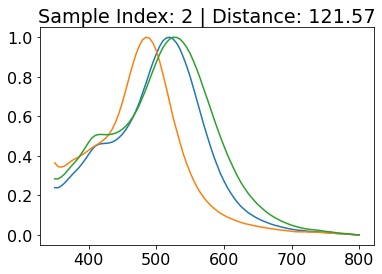

In [43]:
for i in range(len(hit_loc)):
    plt.plot(wv, y[:,hit_loc[i]])
    title_ = 'Sample Index: ' +str(i) + ' | Distance: ' + str(np.round(distances_all_2[hit_loc[i]], 2))
    plt.title(title_)
#    plt.show()

We can plot the samples according to their distance

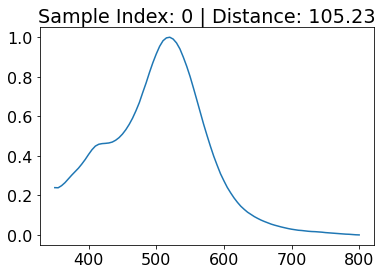

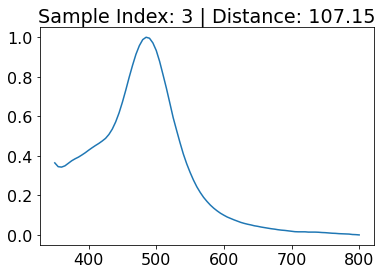

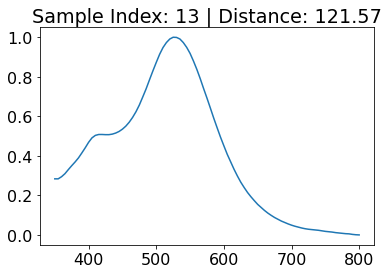

In [44]:
array = np.hstack((hit_loc.reshape(-1,1), distances_all_2[hit_loc].reshape(-1,1)))
array = array[array[:, 1].argsort()]
for i in range(len(array)):
    plt.plot(wv, y[:,int(array[i,0])])
    title_ = 'Sample Index: ' +str(int(array[i,0])) + ' | Distance: ' + str(np.round(array[i,1], 2))
    plt.title(title_)
    plt.show()

In [45]:
classification = np.array([0]*y.shape[1])
classification[hit_loc] = 1

In [46]:
classification

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [38]:
#np.save('classification_5.npy', classification)

## Plotting all the spectra

In [7]:
path_0 = '../Fast Spectroscopic Exploration/Spectra/classification_5.npy'
c = np.load(path_0)

In [15]:
wv = np.linspace(350, 800, 91)

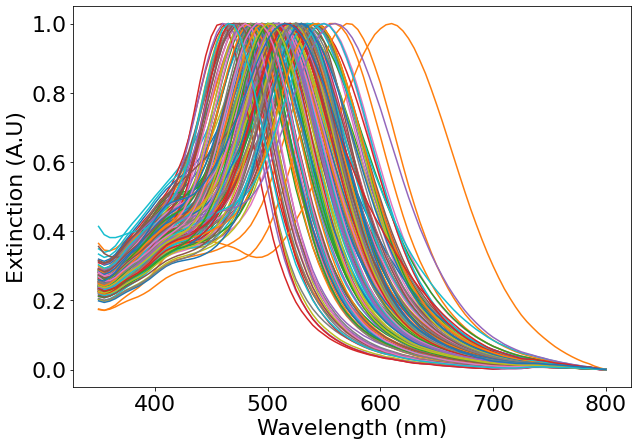

In [26]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(10,7))
for i in range(y.shape[1]):
    if c[i] == 1:
        plt.plot(wv, y[:,i])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Extinction (A.U)')
#plt.savefig('all_spectra_plates.png',bbox_inches="tight", dpi = 400)